In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
# from pandas import DataFrame

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot

# Turn off warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Making list of time
times = []
for hour in range(24):
    for minute in range(0, 60, 10):
        times.append('{:02d}:{:02d}'.format(hour, minute))
        
df_time = pd.DataFrame(times, columns = ['Time'])

# Loading file
path_load = "C:\Shan office\Data\Telecom Italia\Clean data"
GridofInterest = 1;
NoofDAys = 30;
NoofFiles = NoofDAys;

for fi1 in range(1,NoofFiles+1):    
    filenameforload = path_load + "\sms-call-internet-mi-2013-11-" + str(fi1) + ".csv";
    dataset = pd.read_csv(filenameforload)    
    
    # Selecting dataset for only first grid, day 1
    if fi1 == 1:
        df_G1 = dataset[dataset.GridID == GridofInterest]
        df_G1 = pd.concat([df_time, df_G1], axis = 1)
        file_cntr = False
    else:
        df_G1temp = dataset[dataset.GridID == GridofInterest]
        df_G1temp = pd.concat([df_time, df_G1temp], axis = 1)
        df_G1 = pd.concat([df_G1, df_G1temp], axis=0)
    
print(f'We have collected and combined data for {NoofFiles} days for Grid {GridofInterest}')

df_G1.set_index('Time', inplace = True)
df_G1.head(10)

We have collected and combined data for 30 days for Grid 1


,GridID,Day_int,Time_stamp,SMSin,SMSout,Callin,Callout,Internet
Time,,,,,,,,
00:00,1,5,00:00,0.223227,0.156787,0.160938,0.052275,11.028366
00:10,1,5,00:10,0.415040,0.119926,0.188777,0.160938,11.127101
00:20,1,5,00:20,0.384079,0.170952,0.134176,0.054601,10.892771
00:30,1,5,00:30,0.707572,0.220815,0.027300,0.053438,8.622425
00:40,1,5,00:40,0.270679,0.192891,0.053438,0.080738,8.009927
00:50,1,5,00:50,0.083689,0.243378,0.027300,0.027300,8.118420
01:00,1,5,01:00,0.165051,0.084937,0.053438,0.005362,8.026270
01:10,1,5,01:10,0.216078,0.026137,0.001787,0.054601,8.514179
01:20,1,5,01:20,0.242215,0.160314,0.108039,0.026137,6.833425


# 2. Stationarity Test

#### We perform the stationarity test on our data using  Augmented Dicky-Fuller test.

### Theory

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

--><b>Null Hypothesis (H0)</b>: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.<br>
--><b>Alternate Hypothesis (H1)</b>: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

The procedure of the test is that we calculate the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary). 

-> p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. <br>
-> p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

For further details, read [Ref1](https://machinelearningmastery.com/time-series-data-stationary-python/) and [Ref2](https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/)

In [ ]:
result = adfuller(df_G1.Internet.copy().values)
p_val = result[1]
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

# print('\n')
if p_val <= 0.05:
    print(f'The given series is Stationary, as p-value is {p_val} <= 0.05. ')
    print(f'Furthermore, the ADF Statistic is much smaller than 1% cricitical value.')
else:
    print(f'The given series is non-stationary, as p-value is {p_val} > .05')

# Decomposition

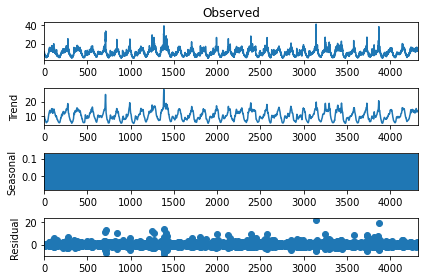

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = df_G1.Internet.values
result = seasonal_decompose(series, model='additive', period = 6)
result.plot()
plt.show()

In [ ]:
trend = result.trend
residual = result.residual

plt.plot(trend)